In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Use seaborn for pairplot
!pip install seaborn
# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-x0myuo02
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-x0myuo02
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=77806 sha256=e735bf21c582ee1eff1906c0d704837e127f27bcb757b5cf0ea990124e177070
  Stored in directory: /tmp/pip-ephem-wheel-cache-4001zl8a/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import math

In [0]:
import numpy as np

In [5]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [7]:
metaData = []
with open('/content/drive/My Drive/Quant/metaData.csv', newline='') as csvfile:
  metareader = csv.reader(csvfile, delimiter=",", quotechar='|')
  for row in metareader:
    metaData.append(row)
numSymbols = int(metaData[1][0])
numTimes = int(metaData[1][1])
numIndependent = int(metaData[1][2])

print(numSymbols, numTimes, numIndependent)

1154 42089 20


In [0]:
indepColumnNames = []
depColumnNames = []

for i in range(int(numSymbols)*int(numIndependent)):
  indepColumnNames.append("Symbol" + str(math.floor(i/20)) + "#" + str(i%20))

for j in range(int(numSymbols)):
  depColumnNames.append("Symbol" + str(j))


In [9]:
print(indepColumnNames)
print(depColumnNames)

['Symbol0#0', 'Symbol0#1', 'Symbol0#2', 'Symbol0#3', 'Symbol0#4', 'Symbol0#5', 'Symbol0#6', 'Symbol0#7', 'Symbol0#8', 'Symbol0#9', 'Symbol0#10', 'Symbol0#11', 'Symbol0#12', 'Symbol0#13', 'Symbol0#14', 'Symbol0#15', 'Symbol0#16', 'Symbol0#17', 'Symbol0#18', 'Symbol0#19', 'Symbol1#0', 'Symbol1#1', 'Symbol1#2', 'Symbol1#3', 'Symbol1#4', 'Symbol1#5', 'Symbol1#6', 'Symbol1#7', 'Symbol1#8', 'Symbol1#9', 'Symbol1#10', 'Symbol1#11', 'Symbol1#12', 'Symbol1#13', 'Symbol1#14', 'Symbol1#15', 'Symbol1#16', 'Symbol1#17', 'Symbol1#18', 'Symbol1#19', 'Symbol2#0', 'Symbol2#1', 'Symbol2#2', 'Symbol2#3', 'Symbol2#4', 'Symbol2#5', 'Symbol2#6', 'Symbol2#7', 'Symbol2#8', 'Symbol2#9', 'Symbol2#10', 'Symbol2#11', 'Symbol2#12', 'Symbol2#13', 'Symbol2#14', 'Symbol2#15', 'Symbol2#16', 'Symbol2#17', 'Symbol2#18', 'Symbol2#19', 'Symbol3#0', 'Symbol3#1', 'Symbol3#2', 'Symbol3#3', 'Symbol3#4', 'Symbol3#5', 'Symbol3#6', 'Symbol3#7', 'Symbol3#8', 'Symbol3#9', 'Symbol3#10', 'Symbol3#11', 'Symbol3#12', 'Symbol3#13', 'Sy

In [10]:
dependents = pd.read_csv('/content/drive/My Drive/Quant/trainDependent.csv', 
                      skiprows=[0], names=depColumnNames,
                      nrows= 1000, sep=",", 
                      skipinitialspace=True)
dependents.dropna(how="all")


,Symbol0,Symbol1,Symbol2,Symbol3,Symbol4,Symbol5,Symbol6,Symbol7,Symbol8,Symbol9,Symbol10,Symbol11,Symbol12,Symbol13,Symbol14,Symbol15,Symbol16,Symbol17,Symbol18,Symbol19,Symbol20,Symbol21,Symbol22,Symbol23,Symbol24,Symbol25,Symbol26,Symbol27,Symbol28,Symbol29,Symbol30,Symbol31,Symbol32,Symbol33,Symbol34,Symbol35,Symbol36,Symbol37,Symbol38,Symbol39,...,Symbol1114,Symbol1115,Symbol1116,Symbol1117,Symbol1118,Symbol1119,Symbol1120,Symbol1121,Symbol1122,Symbol1123,Symbol1124,Symbol1125,Symbol1126,Symbol1127,Symbol1128,Symbol1129,Symbol1130,Symbol1131,Symbol1132,Symbol1133,Symbol1134,Symbol1135,Symbol1136,Symbol1137,Symbol1138,Symbol1139,Symbol1140,Symbol1141,Symbol1142,Symbol1143,Symbol1144,Symbol1145,Symbol1146,Symbol1147,Symbol1148,Symbol1149,Symbol1150,Symbol1151,Symbol1152,Symbol1153
20070103_153000,0.002742,-0.007985,NaN,NaN,0.008441,NaN,NaN,NaN,0.006993,NaN,NaN,NaN,0.008211,0.000248,-0.003042,-0.003764,NaN,NaN,0.003926,NaN,-0.000517,NaN,0.004188,-0.022725,NaN,-0.005892,NaN,NaN,NaN,-0.001102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002847,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.012215,NaN,NaN,NaN,NaN,NaN,0.022353,NaN,NaN,NaN,0.006090,NaN,NaN,-0.003059,0.020563,0.004848,-0.006817,NaN,NaN,NaN,-0.004188,NaN,NaN,NaN,0.003440,0.005370,NaN,NaN,NaN,0.000134,0.013903,NaN,NaN,NaN,NaN,NaN
20070104_093000,0.003462,-0.007592,NaN,NaN,0.001142,NaN,NaN,NaN,-0.000335,NaN,NaN,NaN,0.005043,-0.002726,-0.000697,-0.006008,NaN,NaN,0.003536,NaN,0.001130,NaN,-0.008735,-0.021384,NaN,-0.005479,NaN,NaN,NaN,0.002046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001115,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.006568,NaN,NaN,NaN,NaN,NaN,0.021485,NaN,NaN,NaN,0.002869,NaN,NaN,-0.001600,0.022486,0.000720,-0.009676,NaN,NaN,NaN,0.008735,NaN,NaN,NaN,0.001023,0.000482,NaN,NaN,NaN,0.000554,0.015994,NaN,NaN,NaN,NaN,NaN
20070104_100000,0.001080,-0.009175,NaN,NaN,-0.005825,NaN,NaN,NaN,-0.003336,NaN,NaN,NaN,0.001615,-0.006696,0.000423,-0.000083,NaN,NaN,0.004802,NaN,0.005446,NaN,-0.011114,-0.020646,NaN,0.001306,NaN,NaN,NaN,0.005692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002603,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.005503,NaN,NaN,NaN,NaN,NaN,0.015802,NaN,NaN,NaN,0.003796,NaN,NaN,0.000189,0.020717,0.006393,-0.008817,NaN,NaN,NaN,0.011114,NaN,NaN,NaN,0.001787,0.005004,NaN,NaN,NaN,0.003232,0.015626,NaN,NaN,NaN,NaN,NaN
20070104_103000,0.002744,-0.006723,NaN,NaN,-0.007601,NaN,NaN,NaN,-0.006122,NaN,NaN,NaN,-0.000471,-0.005885,-0.005530,0.005591,NaN,NaN,0.003477,NaN,0.007788,NaN,-0.013394,-0.018263,NaN,0.002706,NaN,NaN,NaN,0.005016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005261,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.006330,NaN,NaN,NaN,NaN,NaN,0.011865,NaN,NaN,NaN,0.007323,NaN,NaN,0.000791,0.013070,0.010848,-0.011836,NaN,NaN,NaN,0.013394,NaN,NaN,NaN,0.005898,0.009371,NaN,NaN,NaN,0.005190,0.016064,NaN,NaN,NaN,NaN,NaN
20070104_110000,0.000468,-0.004899,NaN,NaN,-0.009115,NaN,NaN,NaN,-0.004524,NaN,NaN,NaN,-0.004656,-0.005632,-0.007364,0.006203,NaN,NaN,0.004556,NaN,0.003062,NaN,-0.014114,-0.017662,NaN,0.002392,NaN,NaN,NaN,0.003170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005880,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.004010,NaN,NaN,NaN,NaN,NaN,0.013987,NaN,NaN,NaN,0.006803,NaN,NaN,0.000806,0.014173,0.011158,-0.014239,NaN,NaN,NaN,0.014114,NaN,NaN,NaN,0.004484,0.010339,NaN,NaN,NaN,0.009276,0.014287,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20070424_130000,-0.009679,0.018823,NaN,NaN,0.008059,NaN,NaN,NaN,-0.001056,NaN,NaN,NaN,-0.007416,-0.007177,-0.000189,0.007177,NaN,NaN,-0.006389,NaN,-0.007244,NaN,-0.002918,-0.008972,NaN,0.017331,NaN,NaN,NaN,-0.002094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001590,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000046,NaN,NaN,NaN,NaN,NaN,0.004184,NaN,NaN,NaN,NaN,NaN,NaN,0.010213,-0.002992,NaN,0.004423,NaN,NaN,NaN,0.003302,NaN,NaN,NaN,-0.012225,0.002854,NaN,NaN,NaN,NaN,-0.00116

In [11]:
independents = pd.read_csv('/content/drive/My Drive/Quant/trainIndependents.csv', 
                      skiprows=[0], names=indepColumnNames,
                      nrows=1000, sep=",", 
                      skipinitialspace=True)
independents.dropna(how="all")


,Symbol0#0,Symbol0#1,Symbol0#2,Symbol0#3,Symbol0#4,Symbol0#5,Symbol0#6,Symbol0#7,Symbol0#8,Symbol0#9,Symbol0#10,Symbol0#11,Symbol0#12,Symbol0#13,Symbol0#14,Symbol0#15,Symbol0#16,Symbol0#17,Symbol0#18,Symbol0#19,Symbol1#0,Symbol1#1,Symbol1#2,Symbol1#3,Symbol1#4,Symbol1#5,Symbol1#6,Symbol1#7,Symbol1#8,Symbol1#9,Symbol1#10,Symbol1#11,Symbol1#12,Symbol1#13,Symbol1#14,Symbol1#15,Symbol1#16,Symbol1#17,Symbol1#18,Symbol1#19,...,Symbol1152#0,Symbol1152#1,Symbol1152#2,Symbol1152#3,Symbol1152#4,Symbol1152#5,Symbol1152#6,Symbol1152#7,Symbol1152#8,Symbol1152#9,Symbol1152#10,Symbol1152#11,Symbol1152#12,Symbol1152#13,Symbol1152#14,Symbol1152#15,Symbol1152#16,Symbol1152#17,Symbol1152#18,Symbol1152#19,Symbol1153#0,Symbol1153#1,Symbol1153#2,Symbol1153#3,Symbol1153#4,Symbol1153#5,Symbol1153#6,Symbol1153#7,Symbol1153#8,Symbol1153#9,Symbol1153#10,Symbol1153#11,Symbol1153#12,Symbol1153#13,Symbol1153#14,Symbol1153#15,Symbol1153#16,Symbol1153#17,Symbol1153#18,Symbol1153#19
20070104_093000,-0.004461,-0.004461,-0.004461,-0.005021,0.000000,0.000000,0.000000,-0.006770,-0.006770,-0.006770,-0.008271,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.351299,-1.485281,0.002913,0.002913,0.002913,0.010480,0.000000,0.000000,0.000000,0.004822,0.004822,0.004822,0.001446,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,-0.985249,-0.215312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20070104_100000,-0.002892,-0.002892,-0.002892,-0.006729,0.000000,0.000000,0.000000,-0.004114,-0.004114,-0.004114,-0.004673,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.278004,-1.519324,0.000882,0.000882,0.000882,0.001300,0.000000,0.000000,0.000000,0.002430,0.002430,0.002430,-0.005158,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,-0.540164,-0.049426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20070104_103000,0.002572,-0.001903,-0.001903,-0.006753,0.000000,0.000000,0.000000,0.000451,-0.005443,-0.005443,-0.005892,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.564827,-1.890338,-0.006126,-0.003223,-0.003223,-0.005526,0.000000,0.000000,0.000000,-0.003570,0.001232,0.001232,-0.008503,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,-0.196083,0.345979,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20070104_110000,0.003104,0.000193,0.000193,-0.003690,0.000000,0.000000,0.000000,0.000110,-0.002932,-0.002932,-0.002837,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.580793,-1.806854,-0.005994,-0.003342,-0.003342,-0.001366,0.000000,0.000000,0.000000,-0.001804,0.001254,0.001254,-0.001238,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,-0.275770,0.192714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20070104_113000,0.000371,0.002946,-0.001533,-0.005400,0.000000,0.000000,0.000000,-0.000106,0.000284,-0.005895,-0.005695,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.763975,-1.971434,-0.000904,-0.007025,-0.004111,-0.003492,0.000000,0.000000,0.000000,0.000701,-0.002871,0.001932,-0.000595,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.41,-0.142471,0.236532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20070424_130000,-0.000536,-0.001239,-0.004094,-0.002024,-0.007160,-0.030235,-0.035295,0.001778,0.000013,-0.004773,-0.007009,-0.008959,-

In [0]:
independents = independents.fillna(20)
dependents = dependents.fillna(20)

In [15]:
independents.tail()


,Symbol0#0,Symbol0#1,Symbol0#2,Symbol0#3,Symbol0#4,Symbol0#5,Symbol0#6,Symbol0#7,Symbol0#8,Symbol0#9,Symbol0#10,Symbol0#11,Symbol0#12,Symbol0#13,Symbol0#14,Symbol0#15,Symbol0#16,Symbol0#17,Symbol0#18,Symbol0#19,Symbol1#0,Symbol1#1,Symbol1#2,Symbol1#3,Symbol1#4,Symbol1#5,Symbol1#6,Symbol1#7,Symbol1#8,Symbol1#9,Symbol1#10,Symbol1#11,Symbol1#12,Symbol1#13,Symbol1#14,Symbol1#15,Symbol1#16,Symbol1#17,Symbol1#18,Symbol1#19,...,Symbol1152#0,Symbol1152#1,Symbol1152#2,Symbol1152#3,Symbol1152#4,Symbol1152#5,Symbol1152#6,Symbol1152#7,Symbol1152#8,Symbol1152#9,Symbol1152#10,Symbol1152#11,Symbol1152#12,Symbol1152#13,Symbol1152#14,Symbol1152#15,Symbol1152#16,Symbol1152#17,Symbol1152#18,Symbol1152#19,Symbol1153#0,Symbol1153#1,Symbol1153#2,Symbol1153#3,Symbol1153#4,Symbol1153#5,Symbol1153#6,Symbol1153#7,Symbol1153#8,Symbol1153#9,Symbol1153#10,Symbol1153#11,Symbol1153#12,Symbol1153#13,Symbol1153#14,Symbol1153#15,Symbol1153#16,Symbol1153#17,Symbol1153#18,Symbol1153#19
20070424_130000,-0.000536,-0.001239,-0.004094,-0.002024,-0.007160,-0.030235,-0.035295,0.001778,0.000013,-0.004773,-0.007009,-0.008959,-0.015751,-0.010088,0.0,0.0,0.0,0.0,-1.188646,-1.950066,-0.000644,0.002878,0.007240,0.008103,0.001880,-0.014296,-0.039206,0.000024,0.003608,0.001675,0.000889,-0.001592,-0.019855,-0.040846,0.0,0.0,0.0,0.0,-0.758571,-0.134301,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
20070424_133000,0.001111,-0.001346,-0.004542,-0.003235,-0.007434,-0.029414,-0.033759,0.002736,-0.000010,-0.008133,-0.004842,-0.010330,-0.014641,-0.008997,0.0,0.0,0.0,0.0,-0.743384,-1.360647,0.000185,-0.000023,0.006800,0.007582,0.001260,-0.014329,-0.039610,-0.000260,0.000047,0.005286,-0.000455,-0.002792,-0.020838,-0.041499,0.0,0.0,0.0,0.0,-0.483483,0.012741,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
20070424_140000,-0.002533,-0.003070,-0.004515,-0.007425,-0.012163,-0.029975,-0.034640,-0.001002,0.000539,-0.005252,-0.008465,-0.012713,-0.015445,-0.012800,0.0,0.0,0.0,0.0,-0.859026,-1.208401,-0.001611,-0.002252,0.003489,0.005767,-0.001703,-0.015644,-0.040266,-0.001809,-0.001783,0.004767,-0.001388,-0.006334,-0.020488,-0.040545,0.0,0.0,0.0,0.0,-0.461693,0.242196,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
20070424_143000,-0.003089,-0.001981,-0.004523,-0.006746,-0.012314,-0.031935,-0.035819,-0.001610,0.001117,-0.001370,-0.007346,-0.013028,-0.018915,-0.013752,0.0,0.0,0.0,0.0,-0.949012,-1.358359,-0.000976,-0.000790,0.000220,0.007375,-0.002294,-0.014419,-0.039620,-0.000892,-0.001150,0.001636,-0.000161,-0.005531,-0.019150,-0.039886,0.0,0.0,0.0,0.0,-0.375349,0.109419,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
20070424_150000,-0.000086,-0.002617,-0.003867,-0.006335,-0.011573,-0.032630,-0.035537,0.000477,-0.000885,-0.000884,-0.007006,-0.012764,-0.017072,-0.012339,0.0,0.0,0.0,0.0,-0.897945,-1.589202,0.000694,-0.000913,0.001966,0.004388,-0.002477,-0.014530,-0.039573,-0.000076,-0.001883,0.001725,-0.002730,-0.006674,-0.018517,-0.040293,0.0,0.0,0.0,0.0,-0.048101,0.558304,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0


In [0]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []
  count = 0
  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    temp = dataset.iloc[(i-history_size):i,:].to_numpy();
    data.append(temp)
    labels.append(target[i+target_size])
    count = count + 1
    
  return np.array(data), np.array(labels)

In [0]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

In [0]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [0]:
def create_time_steps(length):
  return list(range(-length, 0))

In [0]:
#CHANGE 2 to NUMSYMBOLS
#TRAINSPLIT
symbolPredictions = []
TRAIN_SPLIT = 800
past_history = 20
future_target = 1
STEP = 1
BATCH_SIZE = 256
BUFFER_SIZE = 10000
EVALUATION_INTERVAL = 200
EPOCHS = 20

for i in range(10):

  curr_independent = independents.iloc[:, (i*numIndependent):((i+1)*numIndependent)]
  curr_dependent = dependents.iloc[:, i]
  print(curr_dependent)

  #features_considered = list(independents.columns)
  
  data_mean = curr_independent[:TRAIN_SPLIT].mean(axis=0)
  data_std = curr_independent[:TRAIN_SPLIT].std(axis=0)
  curr_independent = (curr_independent - data_mean)/data_std

  dData_mean = curr_dependent[:TRAIN_SPLIT].mean(axis=0)
  dData_std = curr_dependent[:TRAIN_SPLIT].std(axis=0)
  curr_dependent = (curr_dependent - dData_mean)/dData_std
  
  target = curr_dependent.to_numpy()


  x_train_single, y_train_single = multivariate_data(curr_independent, target, 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP, single_step=True)
  x_val_single, y_val_single = multivariate_data(curr_independent, target,
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP, single_step=True)

  train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
  train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

  val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
  val_data_single = val_data_single.batch(BATCH_SIZE).repeat()


  single_step_model = tf.keras.models.Sequential()
  single_step_model.add(tf.keras.layers.LSTM(32,
                                            input_shape=x_train_single.shape[-2:]))
  single_step_model.add(tf.keras.layers.Dense(1))

  single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

  single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)
  plot_train_history(single_step_history,
                   'Single Step Training and validation loss')
  
  for x, y in val_data_single.take(1):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                      single_step_model.predict(x)[0]], 12,
                    'Single Step Prediction')
  plot.show()


  #MORE CODE


  #predictions.append()



  


20070103_093000    20.000000
20070103_100000    20.000000
20070103_103000    20.000000
20070103_110000    20.000000
20070103_113000    20.000000
                     ...    
20070424_130000    -0.009679
20070424_133000    -0.009480
20070424_140000    -0.009658
20070424_143000    -0.010938
20070424_150000    -0.011908
Name: Symbol0, Length: 1000, dtype: float64
20 800
780 780 780
820 999
179 179 179
Train for 200 steps, validate for 50 steps
Epoch 1/20
200/200 [==============================] - 3s 14ms/step - loss: 0.0130 - val_loss: 0.0085
Epoch 2/20
200/200 [==============================] - 1s 6ms/step - loss: 0.0081 - val_loss: 0.0088
Epoch 3/20
200/200 [==============================] - 1s 5ms/step - loss: 0.0064 - val_loss: 0.0084
Epoch 4/20
200/200 [==============================] - 1s 6ms/step - loss: 0.0055 - val_loss: 0.0058
Epoch 5/20
200/200 [==============================] - 1s 6ms/step - loss: 0.0049 - val_loss: 0.0059
Epoch 6/20
200/200 [==============================] - 

KeyboardInterrupt: ignored

In [0]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 2us/step


'/root/.keras/datasets/auto-mpg.data'

In [0]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [0]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
dataset = dataset.dropna()

In [0]:
dataset['Origin'] = dataset['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))

In [0]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

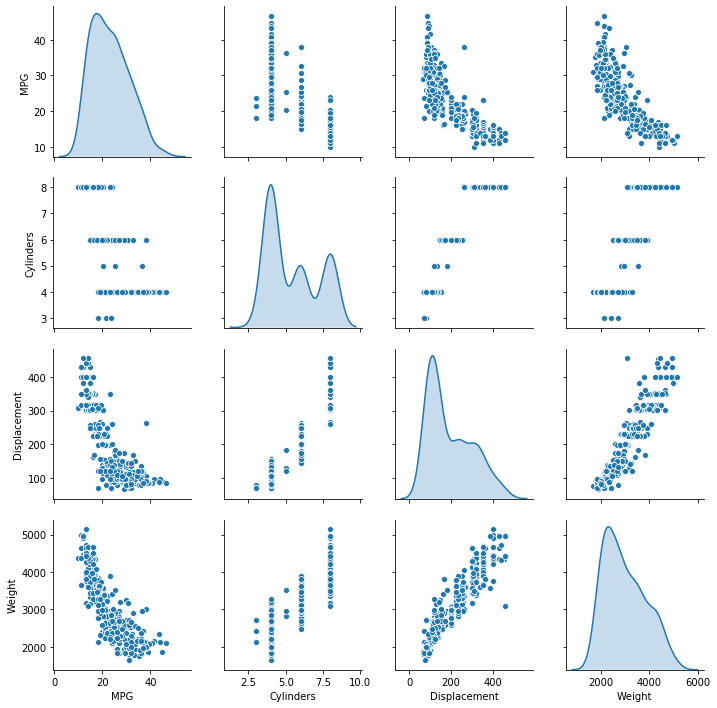

In [0]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [0]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [0]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [0]:
model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_54 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [0]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.1572045 ],
       [-0.16613653],
       [-0.19404551],
       [-0.09667081],
       [ 0.37809566],
       [-0.17032522],
       [ 0.3183616 ],
       [ 0.35874754],
       [-0.21297686],
       [ 0.01952189]], dtype=float32)

In [0]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:562.1649,  mae:22.4900,  mse:562.1649,  val_loss:546.8954,  val_mae:22.1409,  val_mse:546.8954,  
....................................................................................................
Epoch: 100, loss:6.3539,  mae:1.7778,  mse:6.3539,  val_loss:9.0092,  val_mae:2.3197,  val_mse:9.0092,  
....................................................................................................
Epoch: 200, loss:5.5088,  mae:1.6262,  mse:5.5088,  val_loss:9.1566,  val_mae:2.2157,  val_mse:9.1566,  
....................................................................................................
Epoch: 300, loss:5.1127,  mae:1.5248,  mse:5.1127,  val_loss:8.6730,  val_mae:2.2142,  val_mse:8.6730,  
....................................................................................................
Epoch: 400, loss:4.6010,  mae:1.4265,  mse:4.6010,  val_loss:8.6831,  val_mae:2.1753,  val_mse:8.6831,  
..............................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.732879,1.021528,2.732879,9.019019,2.327441,9.019019,995
996,2.998507,1.066073,2.998507,7.959510,2.158707,7.959510,996
997,3.000381,1.023932,3.000381,8.225573,2.179519,8.225573,997
998,2.790861,1.057212,2.790860,8.136318,2.151561,8.136317,998
999,2.809683,1.046715,2.809683,8.299275,2.210971,8.299275,999


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

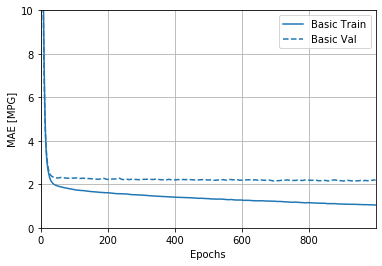

In [0]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

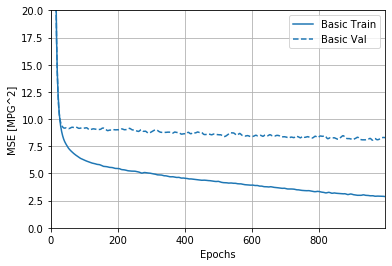

In [0]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:556.7116,  mae:22.3690,  mse:556.7116,  val_loss:540.4174,  val_mae:22.0513,  val_mse:540.4174,  
...............................................

Text(0, 0.5, 'MAE [MPG]')

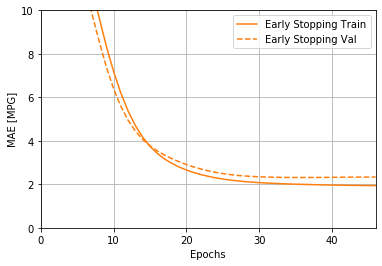

In [0]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 7.2104 - mae: 2.1064 - mse: 7.2104
Testing set Mean Abs Error:  2.11 MPG


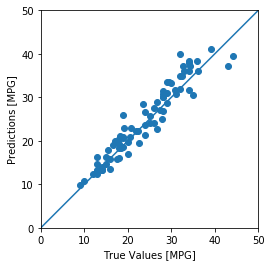

In [0]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


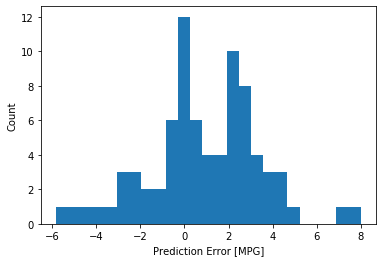

In [0]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")